# PIVOT POINT

Import Library

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tseries.offsets import *
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
#%matplotlib notebook


Import Data 

In [81]:
df2 = pd.read_excel(r'F:\Pivot point\Gold Futures Historical Data.xlsx')
df2 = df.iloc[::-1].reset_index(drop=True)
df2

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-30,1579.85,1576.65,1582.45,1575.65,-,0.0020
1,2020-01-29,1576.70,1567.65,1577.70,1562.35,-,0.0044
2,2020-01-28,1569.80,1580.60,1582.20,1564.60,378.01K,-0.0048
3,2020-01-27,1577.40,1580.50,1588.40,1575.30,398.06K,-0.0029
4,2020-01-26,1581.95,1571.65,1588.10,1571.65,-,0.0064
...,...,...,...,...,...,...,...
262,2019-02-05,1344.60,1343.40,1345.70,1340.80,1.25K,0.0002
263,2019-02-04,1344.30,1346.40,1346.40,1338.00,0.53K,-0.0021
264,2019-02-01,1347.10,1349.80,1352.20,1345.90,0.75K,-0.0021
265,2019-01-31,1350.00,1350.60,1354.60,1347.00,2.65K,0.0071


In [82]:
df2['PP'] = pd.Series((df2['High'] + df2['Low'] + df2['Price']) /3)  
df2['R1'] = pd.Series(2 * df2['PP'] - df2['Low'])  
df2['S1'] = pd.Series(2 * df2['PP'] - df2['High'])  
df2['R2'] = pd.Series(df2['PP'] + df2['High'] - df2['Low'])  
df2['S2'] = pd.Series(df2['PP'] - df2['High'] + df2['Low']) 
df2

,Date,Price,Open,High,Low,Vol.,Change %,PP,R1,S1,R2,S2
0,2020-01-30,1579.85,1576.65,1582.45,1575.65,-,0.0020,1579.316667,1582.983333,1576.183333,1586.116667,1572.516667
1,2020-01-29,1576.70,1567.65,1577.70,1562.35,-,0.0044,1572.250000,1582.150000,1566.800000,1587.600000,1556.900000
2,2020-01-28,1569.80,1580.60,1582.20,1564.60,378.01K,-0.0048,1572.200000,1579.800000,1562.200000,1589.800000,1554.600000
3,2020-01-27,1577.40,1580.50,1588.40,1575.30,398.06K,-0.0029,1580.366667,1585.433333,1572.333333,1593.466667,1567.266667
4,2020-01-26,1581.95,1571.65,1588.10,1571.65,-,0.0064,1580.566667,1589.483333,1573.033333,1597.016667,1564.116667
...,...,...,...,...,...,...,...,...,...,...,...,...
262,2019-02-05,1344.60,1343.40,1345.70,1340.80,1.25K,0.0002,1343.700000,1346.600000,1341.700000,1348.600000,1338.800000
263,2019-02-04,1344.30,1346.40,1346.40,1338.00,0.53K,-0.0021,1342.900000,1347.800000,1339.400000,1351.300000,1334.500000
264,2019-02-01,1347.10,1349.80,1352.20,1345.90,0.75K,-0.0021,1348.400000,1350.900000,1344.600000,1354.700000,1342.100000
265,2019-01-31,1350.00,1350.60,1354.60,1347.00,2.65K,0.0071,1350.533333,1354.066667,1346.466667,1358.133333,1342.933333


Text(0, 0.5, 'Price')

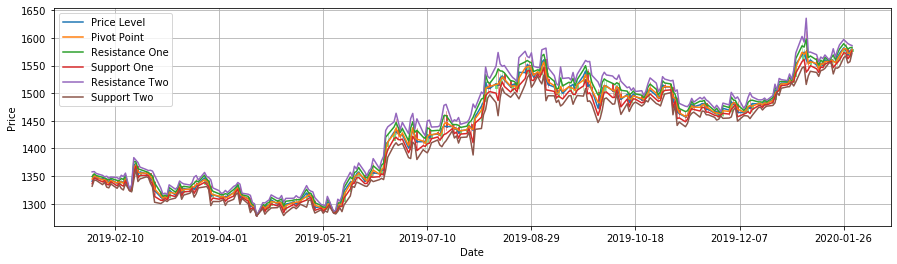

In [83]:

df2['Date'] = pd.to_datetime(df2['Date'])
df2["Date"] = df2["Date"].apply(mdates.date2num)
ohlc= df2[['Date', 'Price', 'High', 'Low','Open']].copy()
            
f1, ax = plt.subplots(figsize = (15,4))
candlestick_ohlc(ax, ohlc.values, width=.5, colorup='#db3f3f', colordown='#77d879')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(df2['Date'], df2['Price'], label = 'Price Level')
plt.plot(df2['Date'], df2['PP'], label = 'Pivot Point')
plt.plot(df2['Date'], df2['R1'], label = 'Resistance One')
plt.plot(df2['Date'], df2['S1'], label = 'Support One')
plt.plot(df2['Date'], df2['R2'], label = 'Resistance Two')
plt.plot(df2['Date'], df2['S2'], label = 'Support Two')
plt.legend(loc=2, prop={'size': 10})
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')